In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.9 MB/s eta 0:00:00


In [3]:
from catboost import CatBoostRegressor
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/preprocess_real_final.csv", encoding =  'cp949')
df = df.drop(['Unnamed: 0'], axis = 1)
X = df.iloc[:,(df.columns != 'price')]
y = df.price
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인'''

Mounted at /content/drive
(35708, 40) (15304, 40) (35708,) (15304,)


In [19]:
df

,body_type_0,body_type_1,body_type_2,city_fuel_economy,daysonmarket,engine_displacement,engine_type_0,engine_type_1,engine_type_2,fleet,...,transmission_1,transmission_2,wheel_system_0,wheel_system_1,year,torque_lb_ft,torque_rpm,power_hp,power_rpm,size
0,0,0,1,0.200000,0.130769,0.444444,0,0,1,0.0,...,0,1,0,1,0.444444,0.469880,0.227273,0.511628,0.4,0.250434
1,0,1,0,0.400000,0.146154,0.222222,0,0,1,0.0,...,0,1,1,0,1.000000,0.783133,0.454545,0.709302,0.4,0.580263
2,0,1,0,0.466667,0.123077,0.888889,0,0,1,0.0,...,0,1,1,0,0.333333,0.795181,0.227273,0.755814,0.0,0.889173
3,0,0,1,0.133333,0.407692,0.888889,0,0,1,1.0,...,0,1,0,1,0.333333,0.795181,0.227273,0.755814,0.0,0.316645
4,0,1,1,0.600000,0.084615,0.222222,0,0,1,0.0,...,0,1,1,0,0.888889,0.783133,0.454545,0.709302,0.4,0.322769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,1,0,1,0.400000,0.092308,0.444444,0,0,1,0.0,...,0,1,1,0,0.555556,0.469880,0.227273,0.511628,0.4,0.007554
51008,0,1,0,0.400000,0.238462,0.888889,0,0,1,1.0,...,0,1,1,0,0.111111,0.795181,0.227273,0.755814,0.0,0.892642
51009,0,1,0,0.666667,0.492308,0.000000,0,0,1,0.0,...,0,1,1,0,0.222222,0.084337,1.000000,0.116279,0.6,0.289382
51010,0,1,0,0.400000,0.238462,0.888889,0,0,1,1.0,...,0,1,1,0,0.111111,0.795181,0.227273,0.755814,0.0,0.892642


In [40]:
cb_model_default = CatBoostRegressor()

cb_model_default.fit(train_x,
             train_y,
             eval_set=(test_x, test_y),
             cat_features=[],
             use_best_model=True,
             verbose=True)

predict_train = cb_model_default.predict(train_x)
predict_test = cb_model_default.predict(test_x)

mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)

print('Mean squared error: ', mse)
print('R2 score: ', r2)

Learning rate set to 0.089265
0:	learn: 3356.1824828	test: 3350.6367252	best: 3350.6367252 (0)	total: 31.7ms	remaining: 31.6s
1:	learn: 3155.6912346	test: 3148.6311699	best: 3148.6311699 (1)	total: 53.9ms	remaining: 26.9s
2:	learn: 2970.2280949	test: 2964.6699087	best: 2964.6699087 (2)	total: 75.7ms	remaining: 25.2s
3:	learn: 2808.2329189	test: 2802.3019190	best: 2802.3019190 (3)	total: 102ms	remaining: 25.4s
4:	learn: 2662.0173527	test: 2655.9273047	best: 2655.9273047 (4)	total: 126ms	remaining: 25.1s
5:	learn: 2532.2247566	test: 2526.1792823	best: 2526.1792823 (5)	total: 148ms	remaining: 24.5s
6:	learn: 2413.5864407	test: 2407.5836436	best: 2407.5836436 (6)	total: 170ms	remaining: 24.1s
7:	learn: 2309.9289207	test: 2303.7225549	best: 2303.7225549 (7)	total: 193ms	remaining: 23.9s
8:	learn: 2219.1641739	test: 2212.7447298	best: 2212.7447298 (8)	total: 216ms	remaining: 23.8s
9:	learn: 2132.4738602	test: 2127.3898613	best: 2127.3898613 (9)	total: 238ms	remaining: 23.6s
10:	learn: 2058.2

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type_0           51012 non-null  int64  
 1   body_type_1           51012 non-null  int64  
 2   body_type_2           51012 non-null  int64  
 3   city_fuel_economy     51012 non-null  float64
 4   daysonmarket          51012 non-null  float64
 5   engine_displacement   51012 non-null  float64
 6   engine_type_0         51012 non-null  int64  
 7   engine_type_1         51012 non-null  int64  
 8   engine_type_2         51012 non-null  int64  
 9   fleet                 51012 non-null  float64
 10  frame_damaged         51012 non-null  float64
 11  franchise_dealer      51012 non-null  float64
 12  fuel_tank_volume      51012 non-null  float64
 13  fuel_type_0           51012 non-null  int64  
 14  fuel_type_1           51012 non-null  int64  
 15  fuel_type_2        

In [ ]:
cols_to_fit = [col for col in train_x.columns]
cb_model = CatBoostRegressor(iterations=1000,
                             learning_rate=0.1,
                             depth=8,
)
cb_model.fit(train_x,
             train_y,
             eval_set=(test_x, test_y),
             cat_features=[],
             use_best_model=True,
             verbose=True)

predict_train = cb_model.predict(train_x)
predict_test = cb_model.predict(test_x)

mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)

print('Mean squared error: ', mse)
print('R2 score: ', r2)

0:	learn: 3311.4554927	test: 3305.9037209	best: 3305.9037209 (0)	total: 14ms	remaining: 14s
1:	learn: 3078.6344697	test: 3074.0061895	best: 3074.0061895 (1)	total: 28.2ms	remaining: 14.1s
2:	learn: 2875.0423990	test: 2870.8604665	best: 2870.8604665 (2)	total: 42.3ms	remaining: 14.1s
3:	learn: 2695.3516474	test: 2691.3825447	best: 2691.3825447 (3)	total: 55.3ms	remaining: 13.8s
4:	learn: 2536.0469238	test: 2532.4076072	best: 2532.4076072 (4)	total: 68.6ms	remaining: 13.6s
5:	learn: 2396.9589926	test: 2392.5082847	best: 2392.5082847 (5)	total: 81.6ms	remaining: 13.5s
6:	learn: 2273.7760982	test: 2268.1073131	best: 2268.1073131 (6)	total: 94.6ms	remaining: 13.4s
7:	learn: 2164.9005554	test: 2158.5972595	best: 2158.5972595 (7)	total: 107ms	remaining: 13.3s
8:	learn: 2066.7065951	test: 2061.5046658	best: 2061.5046658 (8)	total: 122ms	remaining: 13.5s
9:	learn: 1979.8770273	test: 1976.1837746	best: 1976.1837746 (9)	total: 143ms	remaining: 14.2s
10:	learn: 1906.0414477	test: 1902.8153123	best

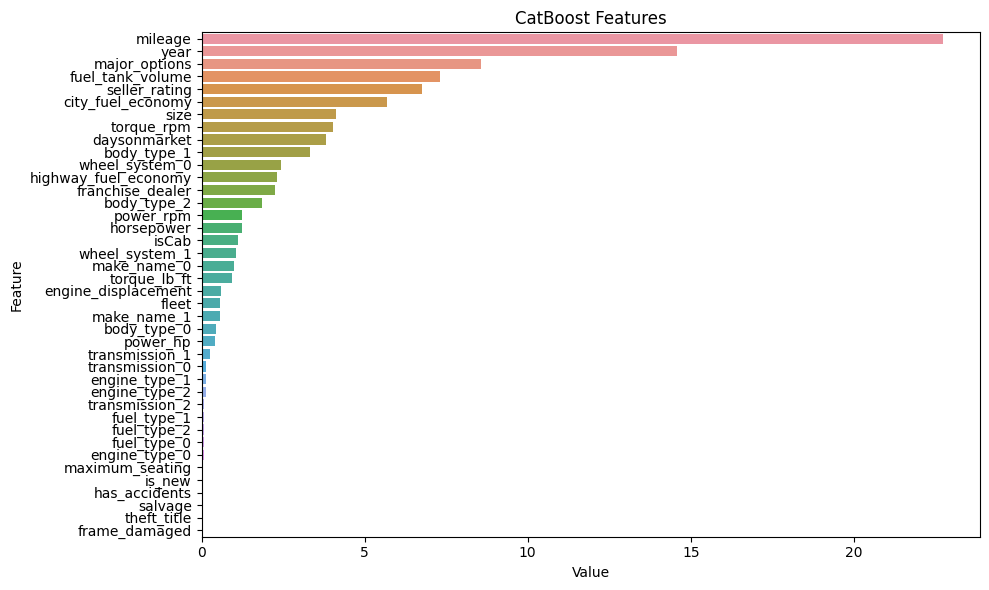

In [ ]:
feature_importance = pd.DataFrame(sorted(zip(cb_model.feature_importances_, cols_to_fit)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('CatBoost Features')
plt.tight_layout()

In [ ]:
params = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [4, 6, 8]
         }

In [ ]:
grid_search = GridSearchCV(CatBoostRegressor(), params, cv=3, n_jobs=-1)

In [ ]:
grid_search.fit(train_x, train_y, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 3311.4554927	total: 23.5ms	remaining: 7.04s
1:	learn: 3078.6344697	total: 38.6ms	remaining: 5.74s
2:	learn: 2875.0423990	total: 52.1ms	remaining: 5.16s
3:	learn: 2695.3516474	total: 65.8ms	remaining: 4.87s
4:	learn: 2536.0469238	total: 79.5ms	remaining: 4.69s
5:	learn: 2396.9589926	total: 92.7ms	remaining: 4.54s
6:	learn: 2273.7760982	total: 106ms	remaining: 4.43s
7:	learn: 2164.9005554	total: 121ms	remaining: 4.42s
8:	learn: 2066.7065951	total: 135ms	remaining: 4.35s
9:	learn: 1979.8770273	total: 148ms	remaining: 4.3s
10:	learn: 1906.0414477	total: 162ms	remaining: 4.25s
11:	learn: 1839.7962476	total: 175ms	remaining: 4.21s
12:	learn: 1785.3017102	total: 192ms	remaining: 4.23s
13:	learn: 1734.7161399	total: 204ms	remaining: 4.17s
14:	learn: 1693.2936705	total: 217ms	remaining: 4.12s
15:	learn: 1653.5528997	total: 235ms	remaining: 4.16s
16:	learn: 1622.0213904	total: 247ms	remaining: 4.12s
17:	learn: 1592.7828280	total: 260ms	remaining: 4.08s
18:	learn: 1565.0715757	total: 27

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7faa971be980>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'learning_rate': [0.1, 0.01, 0.001]})

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'depth': 8, 'iterations': 300, 'learning_rate': 0.1}
0.8744894727161577


In [ ]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)

In [ ]:
final_result.columns = ['label','predict']

<Axes: xlabel='label', ylabel='predict'>

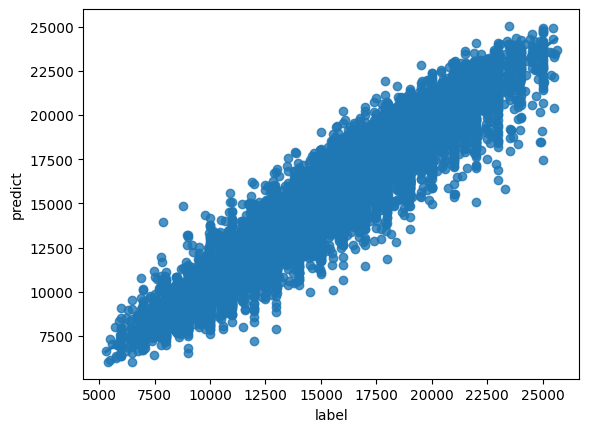

In [ ]:
sns.regplot(x = 'label', y = 'predict', data = final_result)

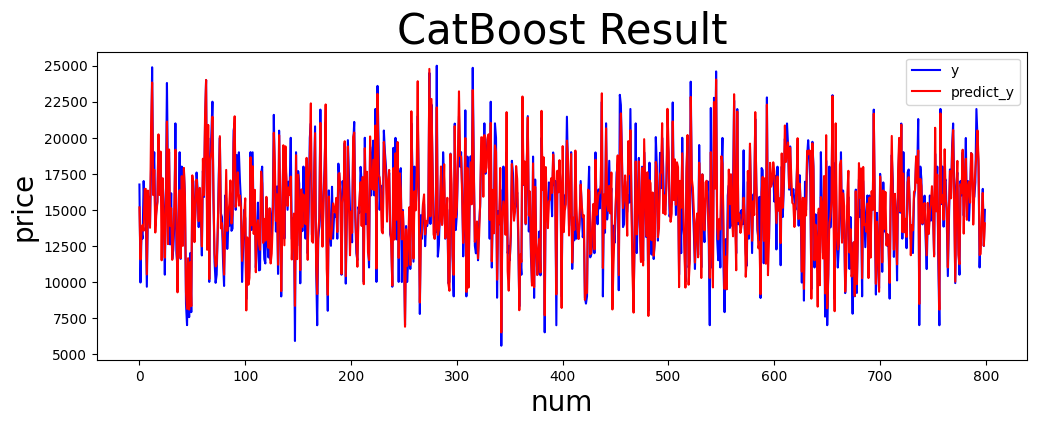

In [ ]:
import matplotlib.pyplot as plt

pre = pd.DataFrame(predict_test)
test_y = test_y.reset_index()
result = pd.concat([test_y, pre], axis = 1)
result.columns = ['a', 'real', 'predict']

fig = plt.figure(figsize = (12,4))
chart = fig.add_subplot(1,1,1)
chart.plot(result.real[:800],  color = 'blue', label = 'y')
chart.plot(result.predict[:800],  color = 'red', label = 'predict_y')
chart.set_title('CatBoost Result', size=30)
plt.xlabel('num', size = 20)
plt.ylabel('price', size = 20)
plt.legend(loc = 'best')